In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [64]:
var = pd.read_csv("C:/Users/KASYAP KRISHNA/Downloads/Datasets/rentalHouses.csv")

In [65]:
var.head()

,id,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [66]:
df = var.copy()

In [67]:
df.isnull().sum()

id                0
city              0
area              0
rooms             0
bathroom          0
parking spaces    0
floor             0
animal            0
furniture         0
hoa               0
rent amount       0
property tax      0
fire insurance    0
total             0
dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              6080 non-null   int64 
 1   city            6080 non-null   int64 
 2   area            6080 non-null   int64 
 3   rooms           6080 non-null   int64 
 4   bathroom        6080 non-null   int64 
 5   parking spaces  6080 non-null   int64 
 6   floor           6080 non-null   object
 7   animal          6080 non-null   object
 8   furniture       6080 non-null   object
 9   hoa             6080 non-null   object
 10  rent amount     6080 non-null   object
 11  property tax    6080 non-null   object
 12  fire insurance  6080 non-null   object
 13  total           6080 non-null   object
dtypes: int64(6), object(8)
memory usage: 665.1+ KB


In [69]:
df['id'].duplicated().sum()

0

# Data Cleaning

In [70]:
# Removing unwanted columns from the dataframe

df.drop(['id', 'floor'], axis=1, inplace = True)

In [71]:
# Using regex to remove unwanted characters from columns.

df['rent amount'] = df['rent amount'].str.replace(r'R\$', '', regex=True)

df['property tax'] = df['property tax'].str.replace(r'R\$', '', regex=True)

df['fire insurance'] = df['fire insurance'].str.replace(r'R\$', '', regex=True)

df['total'] = df['total'].str.replace(r'R\$', '', regex=True)

df['hoa'] = df['hoa'].str.replace(r'R\$', '', regex=True)

df.rename(columns={'hoa':'house allowance'}, inplace = True)

In [72]:
replaceValues = {'acept' : 1, 'not acept' : 0}
df['animal'] = df['animal'].apply(lambda x: replaceValues[x] if x in replaceValues else x)

replaceFurn = {'furnished' : 1, 'not furnished' : 0}
df['furniture'] = df['furniture'].apply(lambda x : replaceFurn[x] if x in replaceFurn else x)

In [73]:
df.head()

,city,area,rooms,bathroom,parking spaces,animal,furniture,house allowance,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,1,1,0,"8,000","1,000",121,"9,121"
1,0,64,2,1,1,1,0,540,820,122,11,"1,493"
2,1,443,5,5,4,1,1,"4,172","7,000","1,417",89,"12,680"
3,1,73,2,2,1,1,0,700,"1,250",150,16,"2,116"
4,1,19,1,1,0,0,0,0,"1,200",41,16,"1,257"


# Changing Datatypes to int

In [74]:
df.rename(columns={'house allowance' : 'houseAllowance'}, inplace = True)

In [75]:
df['houseAllowance'] = df['houseAllowance'].str.replace("Sem info", "2154")

df['houseAllowance'] = df['houseAllowance'].str.replace(",", "")

df['houseAllowance'] = df['houseAllowance'].str.replace("Incluso", "3657")

df['houseAllowance'] = pd.to_numeric(df['houseAllowance'])

In [76]:
df['rent amount'] = df['rent amount'].str.replace(",", "")

df['rent amount'] = pd.to_numeric(df['rent amount'])

In [77]:
df['property tax'] = df['property tax'].str.replace(",", "")

df['property tax'] = df['property tax'].str.replace("Incluso", "3657")

df['property tax'] = pd.to_numeric(df['property tax'])

In [78]:
df['fire insurance'] = pd.to_numeric(df['fire insurance'])

In [79]:
df['total'] = df['total'].str.replace(",", "")

df['total'] = pd.to_numeric(df['total'])

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   city            6080 non-null   int64
 1   area            6080 non-null   int64
 2   rooms           6080 non-null   int64
 3   bathroom        6080 non-null   int64
 4   parking spaces  6080 non-null   int64
 5   animal          6080 non-null   int64
 6   furniture       6080 non-null   int64
 7   houseAllowance  6080 non-null   int64
 8   rent amount     6080 non-null   int64
 9   property tax    6080 non-null   int64
 10  fire insurance  6080 non-null   int64
 11  total           6080 non-null   int64
dtypes: int64(12)
memory usage: 570.1 KB


# Outlier Detection and Removal

{'whiskers': [<matplotlib.lines.Line2D at 0x1e6d32fb2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e6d32fb820>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e6d32fb040>],
 'medians': [<matplotlib.lines.Line2D at 0x1e6d32fbd60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e6d3356040>],
 'means': []}

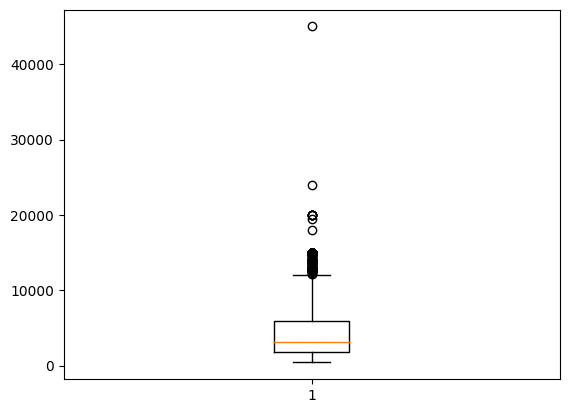

In [81]:
a = df['rent amount']
plt.boxplot(a)

<Axes: xlabel='rent amount'>

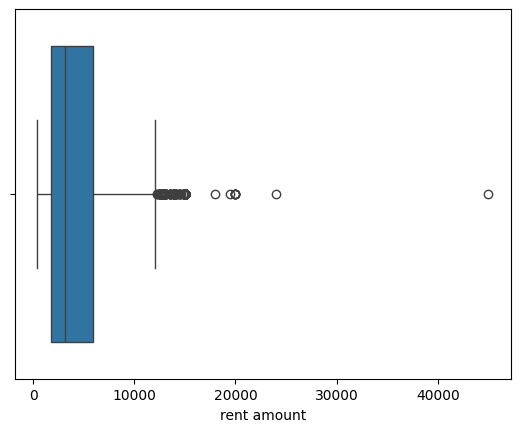

In [82]:
sns.boxplot(x='rent amount', data=df)

In [83]:
print(df['rent amount'].mode())

0    15000
Name: rent amount, dtype: int64


In [84]:
df1 = df[df['rent amount'] < 7500 ]

<Axes: xlabel='rent amount'>

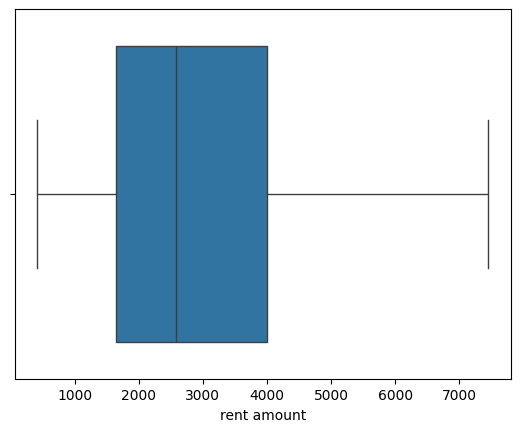

In [85]:
sns.boxplot(x='rent amount', data=df1)

In [ ]:
df1.info()

## 

# Feature Selection

In [169]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

In [205]:
df = pd.DataFrame(df1)

x = df1.values
y = df1['total']

x = x.astype(int)

In [206]:
chi2_selector = SelectPercentile(chi2)
kBest = chi2_selector.fit_transform(x,y)

In [207]:
chi2_scores = pd.DataFrame(list(zip(x, chi2_selector.scores_)), columns=['feature','score'])
chi2_scores

,feature,score
0,"[0, 64, 2, 1, 1, 1, 0, 540, 820, 122, 11, 1493]",5.642012e+02
1,"[1, 443, 5, 5, 4, 1, 1, 4172, 7000, 1417, 89, ...",1.698946e+06
2,"[1, 73, 2, 2, 1, 1, 0, 700, 1250, 150, 16, 2116]",1.906536e+03
3,"[1, 19, 1, 1, 0, 0, 0, 0, 1200, 41, 16, 1257]",3.097702e+03
4,"[1, 13, 1, 1, 0, 1, 0, 0, 2200, 42, 28, 2270]",5.201615e+03
5,"[1, 55, 1, 1, 1, 1, 1, 1950, 5000, 375, 64, 7389]",8.922358e+02
6,"[1, 55, 2, 2, 1, 1, 0, 600, 1300, 67, 17, 1984]",2.956773e+03
7,"[1, 82, 3, 1, 1, 1, 1, 828, 2000, 109, 26, 2963]",4.539429e+06
8,"[1, 32, 1, 1, 1, 1, 0, 533, 2900, 0, 37, 3470]",4.680922e+06
9,"[0, 60, 1, 1, 0, 1, 0, 480, 720, 20, 10, 1230]",5.973984e+08


In [208]:
print(f"Original features are {x.shape[1]}")
print(f"Number of reduced features {kBest.shape[1]}")

Original features are 12
Number of reduced features 2


In [210]:
selected_features_array = df1.columns[chi2_selector.get_support()]

In [211]:
np.asarray(df1.columns)[chi2_selector.get_support()]

array(['property tax', 'total'], dtype=object)

# Normalization

In [214]:
#objectColumns = ['house allowance',	'rent amount',	'property tax',	'fire insurance',	'total']

#for column in objectColumns:
#    df[column] = df[column].replace('[^\d.]', '', regex=True).astype(float)

objectColumns = ['houseAllowance', 'rent amount', 'fire insurance']

for column in objectColumns:
    df1[column] = pd.to_numeric(df1[column].replace('[^\d.]', '', regex=True), errors='coerce')


In [215]:
dfNorm = (df1-df1.min())/(df1.max()-df1.min())

In [231]:
df1.drop(columns=['property tax', 'total'], inplace = True)

In [228]:
dfNorm.to_csv("C:/Users/KASYAP KRISHNA/Downloads/normData.csv", index=False)

# Standardization

In [219]:
std_scaler = StandardScaler()
 

dfScaled = std_scaler.fit_transform(df1.to_numpy())
dfScaled = pd.DataFrame(dfScaled, columns=['city',	'area',	'rooms',	'bathroom',	'parking spaces',	'animal',	'furniture',	'houseAllowance',	'rent amount',	'property tax', 	'fire insurance',	'total'])

In [220]:
dfScaled.head()

,city,area,rooms,bathroom,parking spaces,animal,furniture,houseAllowance,rent amount,property tax,fire insurance,total
0,-2.337206,-0.253665,-0.267487,-0.838162,-0.310556,0.569809,-0.557183,-0.380861,-1.287144,-0.039286,-1.196913,-0.376461
1,0.427861,1.641170,2.658104,2.544921,1.937494,0.569809,1.794741,3.343464,2.358409,0.150329,2.111900,1.160709
2,0.427861,-0.208669,-0.267487,0.007609,-0.310556,0.569809,-0.557183,-0.216794,-1.033489,-0.035187,-0.984809,-0.290857
3,0.427861,-0.478646,-1.242684,-0.838162,-1.059906,-1.754974,-0.557183,-0.934588,-1.062984,-0.051146,-0.984809,-0.408889
4,0.427861,-0.508643,-1.242684,-0.838162,-1.059906,0.569809,-0.557183,-0.934588,-0.473089,-0.051000,-0.475761,-0.269696


# Plots

In [221]:
colList = ['rooms',	'parking spaces', 'houseAllowance',	'rent amount','fire insurance']

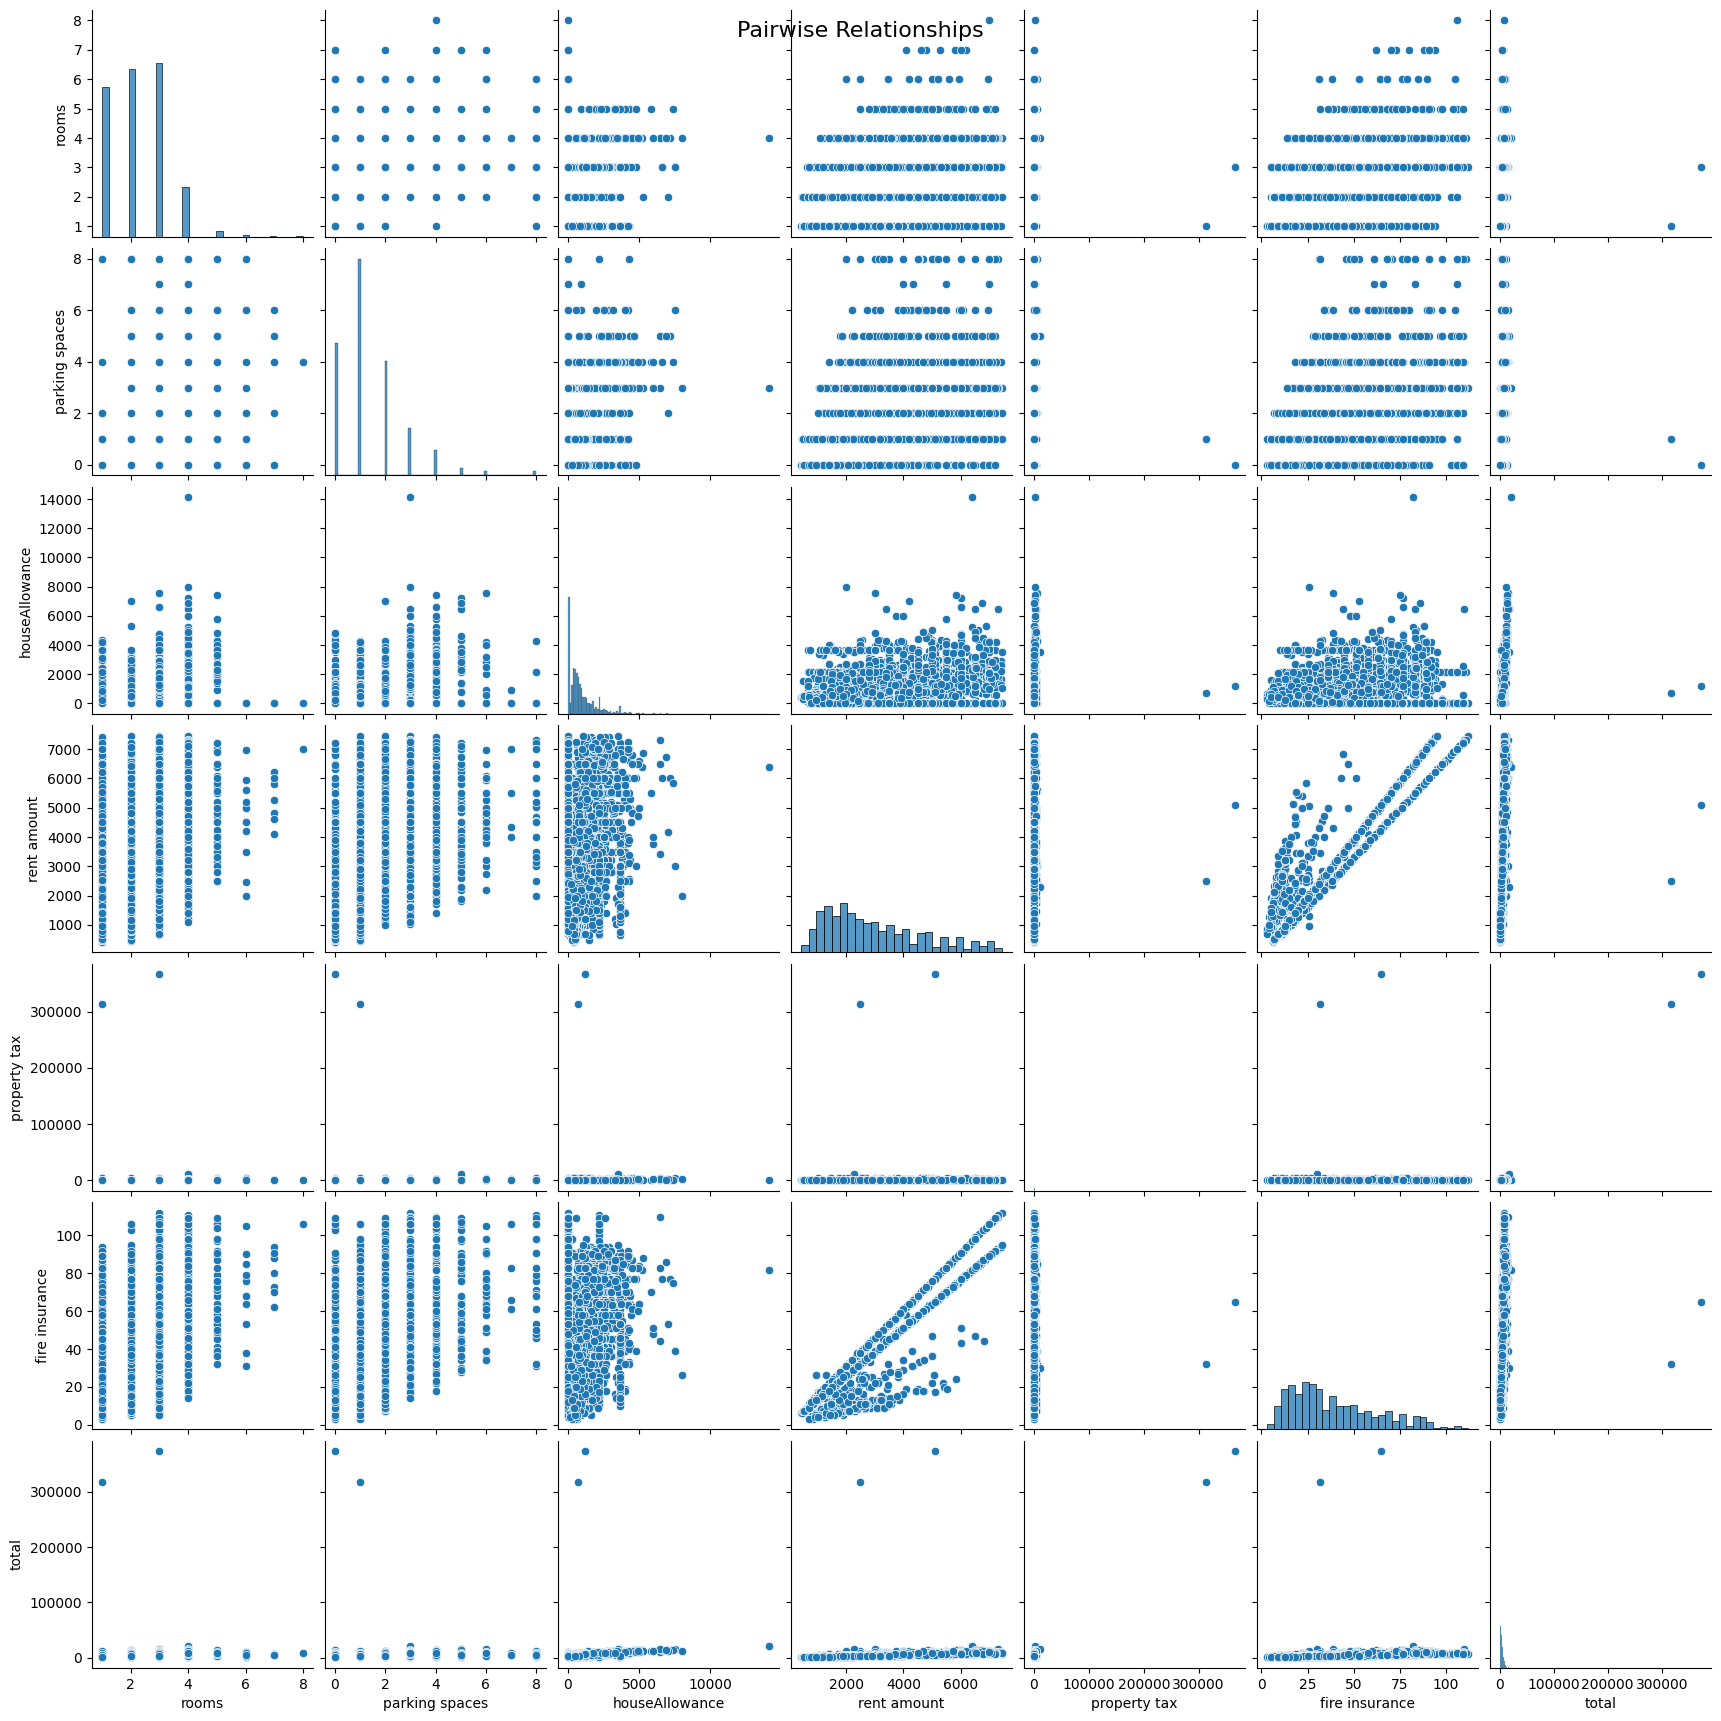

In [133]:
sns.pairplot(df1[colList])
plt.suptitle("Pairwise Relationships", fontsize=16)
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap for Rental Houses')

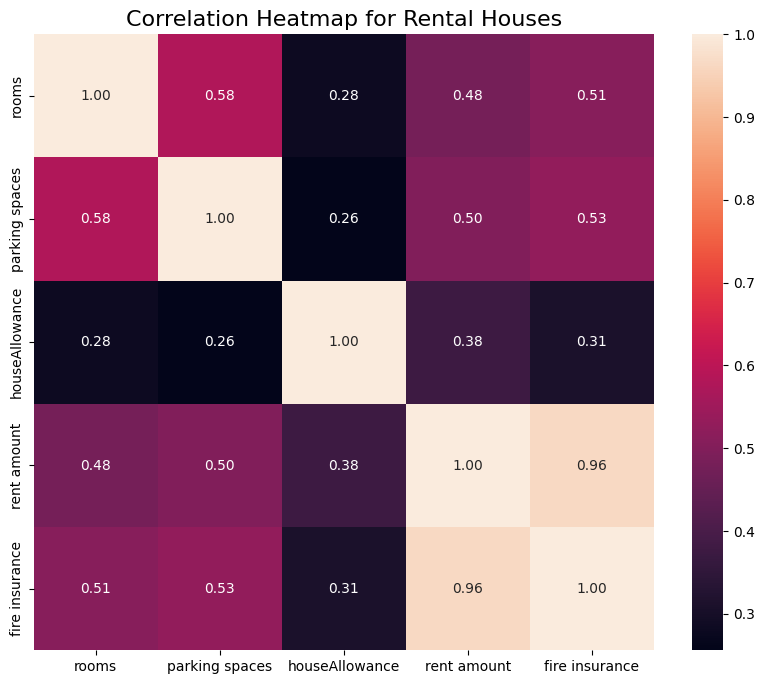

In [223]:
''' Correlation heatmap '''
plt.figure(figsize=(10, 8))
sns.heatmap(df1[colList].corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap for Rental Houses", fontsize=16)


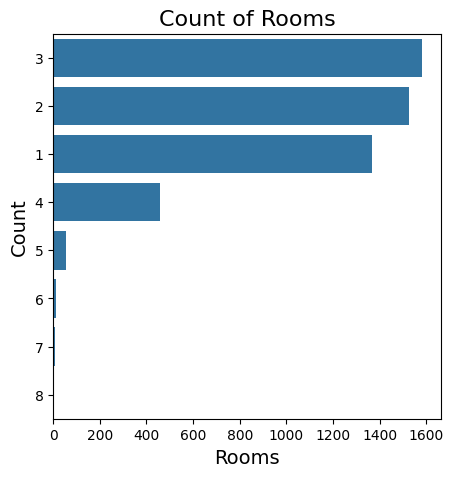

In [224]:
plt.figure(figsize=(5, 5))
sns.countplot(y='rooms', data=df1, order=df1['rooms'].value_counts().index)
plt.title("Count of Rooms", fontsize=16)
plt.ylabel("Count", fontsize=14)
plt.xlabel("Rooms", fontsize=14)
plt.show()

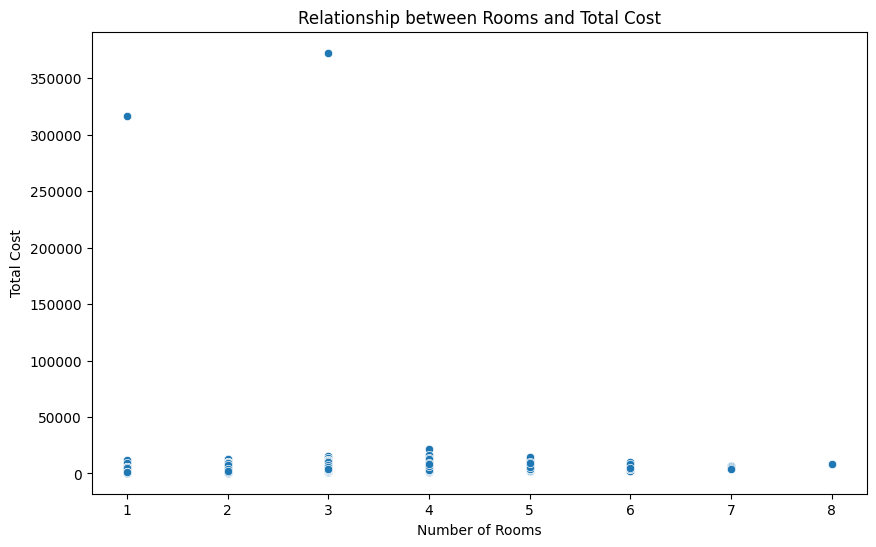

In [225]:
numeric_columns = ['rooms', 'total']
df1[numeric_columns] = df1[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Scatter plot to visualize the relationship between rooms and total cost
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rooms', y='total', data=df)
plt.title('Relationship between Rooms and Total Cost')
plt.xlabel('Number of Rooms')
plt.ylabel('Total Cost')
plt.show()

In [232]:
df1.head()

,city,area,rooms,bathroom,parking spaces,animal,furniture,houseAllowance,rent amount,fire insurance
1,0,64,2,1,1,1,0,540,820,11
2,1,443,5,5,4,1,1,4172,7000,89
3,1,73,2,2,1,1,0,700,1250,16
4,1,19,1,1,0,0,0,0,1200,16
5,1,13,1,1,0,1,0,0,2200,28


In [233]:
df1.to_csv("C:/Users/KASYAP KRISHNA/Downloads/cleanData.csv", index=False)

In [234]:
from sklearn.linear_model import LinearRegression

In [235]:
data = pd.read_csv('../../Downloads/normData.csv')

In [236]:
data.head()

,city,area,rooms,bathroom,parking spaces,animal,furniture,houseAllowance,rent amount,fire insurance
0,0.0,0.004245,0.142857,0.000000,0.125,1.0,0.0,0.038217,0.056899,0.073394
1,1.0,0.034036,0.571429,0.571429,0.500,1.0,1.0,0.295258,0.935989,0.788991
2,1.0,0.004952,0.142857,0.142857,0.125,1.0,0.0,0.049540,0.118065,0.119266
3,1.0,0.000707,0.000000,0.000000,0.000,0.0,0.0,0.000000,0.110953,0.119266
4,1.0,0.000236,0.000000,0.000000,0.000,1.0,0.0,0.000000,0.253201,0.229358


In [238]:
X = data[['area', 'rooms']]
y = data['rent amount']

In [239]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [240]:
y_test.count()

1001

In [244]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [245]:
from sklearn.metrics import accuracy_score
accuracy = model.score(X_test,y_test)
print(accuracy*100,'%')


#accuracy_score(y_test,y_pred)

25.228315617090203 %


In [246]:
y_pred = model.predict(X_test)

In [247]:
y_pred

array([0.44919897, 0.33100538, 0.22941165, ..., 0.33430594, 0.48375778,
       0.4431803 ])

In [248]:
y_test

1501    0.964438
2586    0.722617
2653    0.238976
1055    0.139403
705     0.167852
          ...   
2313    0.032717
3214    0.189189
2732    0.150782
1926    0.722617
4228    0.310100
Name: rent amount, Length: 1001, dtype: float64

In [254]:
from sklearn.metrics import r2_score


y_pred = model.predict(X_test)
r2 = r2_score(y_test,y_pred)
print("R-squared:", r2*100)

R-squared: 25.228315617090203


In [250]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 0.04260366964238797


In [ ]:
X_test

# feature selection